In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../../src/')
from helper_functions import *
plt.style.use('dynamics_site')
import time

In [3]:
def integrate_leapfrog(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]

    for i in range(steps-1):
        avec = get_acclerations(rvec,mvec)
        new_vvec_half = vvec + (dt/2)*avec  #here's the first kick
        new_rvec = rvec + dt*new_vvec_half #here's the drift
        avec_half = get_acclerations(new_rvec,mvec) #update the acclerations
        new_vvec = new_vvec_half + (dt/2)*avec_half  #here's the second kick

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

In [4]:
def integrate_ruth3(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    a1,a2,a3=2/3,-2/3,1
    b1,b2,b3=7/24,3/4,-1/24


    for i in range(steps-1):
        x1 = rvec
        v1 = vvec

        v2  = v1 + b1*get_acclerations(x1,mvec)*dt
        x2  = x1 + a1*v2*dt
        v3  = v2 + b2*get_acclerations(x2,mvec)*dt
        x3  = x2 + a2*v3*dt
        v4  = v3 + b3*get_acclerations(x3,mvec)*dt
        x4  = x3 + a3*v4*dt
        
        new_rvec = x4
        new_vvec = v4

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

In [5]:
def integrate_ruth4(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    fac = 1/(2-np.cbrt(2))
    acoeff = np.array([1/2, (1-np.cbrt(2))/2 ,(1-np.cbrt(2))/2, 1/2 ])*fac
    bcoeff = np.array([0, 1 ,-np.cbrt(2), 1 ])*fac
    a1,a2,a3,a4=acoeff
    b1,b2,b3,b4=bcoeff

    for i in range(steps-1):
        x1 = rvec
        v1 = vvec

        v2  = v1 + b1*get_acclerations(x1,mvec)*dt
        x2  = x1 + a1*v2*dt
        v3  = v2 + b2*get_acclerations(x2,mvec)*dt
        x3  = x2 + a2*v3*dt  
        v4  = v3 + b3*get_acclerations(x3,mvec)*dt
        x4  = x3 + a3*v4*dt  
        v5  = v4 + b4*get_acclerations(x4,mvec)*dt
        x5  = x4 + a4*v5*dt  

        new_rvec = x5
        new_vvec = v5

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

In [28]:
dts = np.logspace(-1.5,-5,15)
steps = (1/dts).astype(int) #run simulation for 1 year

E_leapfrog = []
T_leapfrog = []
E_ruth3 = []
T_ruth3 = []
E_ruth4 = []
T_ruth4 = []



for i in range(len(dts)):
    dt = dts[i]
    step = steps[i]
    
    start = time.time()
    _,_,Es = integrate_leapfrog('../../src/Full-Solar.npy',dt,step)
    end = time.time()
    T_leapfrog.append(end-start)
    E_leapfrog.append(np.abs(Es[0]-Es[-1]))
    
    start = time.time()
    _,_,Es = integrate_ruth3('../../src/Full-Solar.npy',dt,step)
    end = time.time()
    T_ruth3.append(end-start)
    E_ruth3.append(np.abs(Es[0]-Es[-1]))

    start = time.time()
    _,_,Es = integrate_ruth4('../../src/Full-Solar.npy',dt,step)
    end = time.time()
    T_ruth4.append(end-start)
    E_ruth4.append(np.abs(Es[0]-Es[-1]))


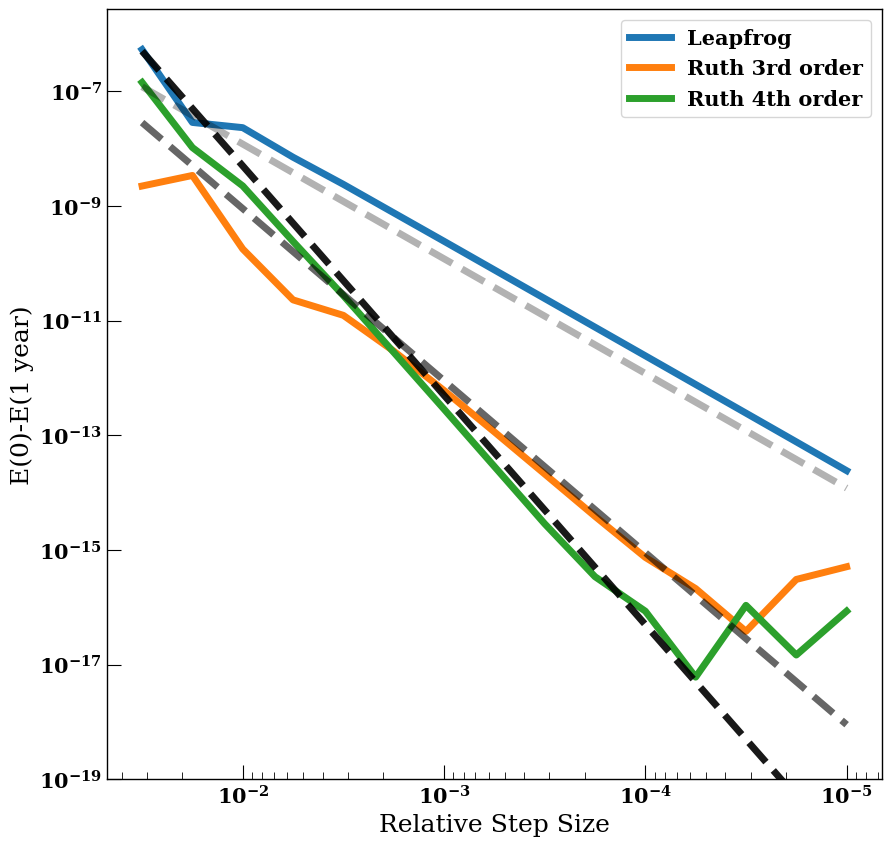

In [45]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(dts,E_leapfrog,label='Leapfrog')
plt.plot(dts,E_ruth3,label='Ruth 3rd order')
plt.plot(dts,E_ruth4,label='Ruth 4th order')
plt.plot(dts,(dts**2)*12e-5,c='k',ls='--',alpha=0.3)
plt.plot(dts,(dts**3)*9e-4,c='k',ls='--',alpha=0.6)
plt.plot(dts,(dts**4)*5e-1,c='k',ls='--',alpha=0.9)

plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=1e-19)
    
plt.gca().invert_xaxis()
plt.xlabel("Relative Step Size")
plt.ylabel("E(0)-E(1 year)")
ax.legend(loc='best')
plt.savefig('sym_errorstep.png')

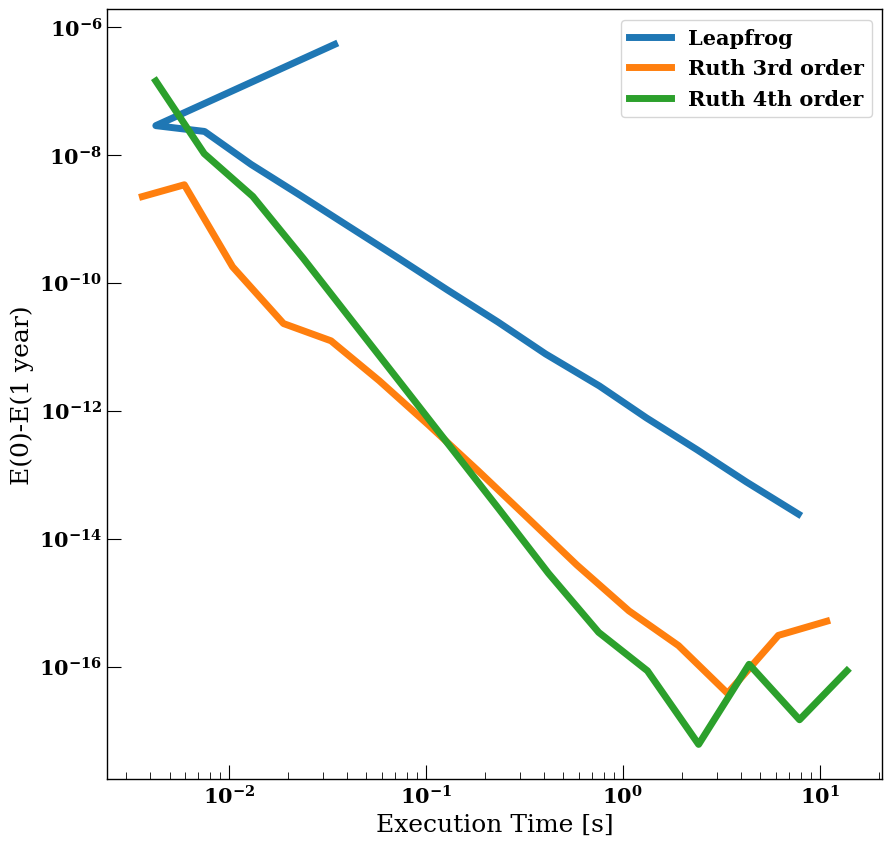

In [30]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(T_leapfrog,E_leapfrog,label='Leapfrog')
plt.plot(T_ruth3,E_ruth3,label='Ruth 3rd order')
plt.plot(T_ruth4,E_ruth4,label='Ruth 4th order')
#plt.plot(T_euler,(np.array(T_euler)**-1)*2e-7,c='k',ls='--',alpha=0.3)
#plt.plot(T_euler,(np.array(T_euler)**-3)*3e-15,c='k',ls='--',alpha=0.6)
#plt.plot(T_euler[:-3],(np.array(T_euler[:-3])**-5)*3e-21,c='k',ls='--',alpha=0.6)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Execution Time [s]")
plt.ylabel("E(0)-E(1 year)")
ax.legend(loc='best')
plt.savefig('symp_errortime.png')
plt.show()